# **Hands-on Clsutering**

---

Clustering com sklearn 

Vamos começar a analisar algoritmos de clusterização de acordo com as métricas vistas nas aula anteriores. 

Para isso, usaremos 2 algoritmos de clustering diferentes. Todas as implementações são provenivientes do sklearn. São eles: 


*   <a href = https://scikit-learn.org/stable/modules/clustering.html#k-means> K-means </a>
*   <a href = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation> Affinity Propagation </a>

Esses métodos são amplamente utilizados no dia-a-dia quando se trata de uma tarefa de clusterização. Mais informações sobre esses modelos podem ser encontradas nos links para a documentação do sklearn. 


Vamos utilizar a base de dados **cms.csv** </a> que pode ser encontrada no OpenML em: https://www.openml.org/d/23. Essa base descreve o problema de predizer o método contracepitivo escolhido por um conjunto específico de mulheres do 1987 National Indonesia Contraceptive Prevalence Survey. Essa base de dados é tradicionalmente aplicada a problemas de classificação. 

Aqui, como estamos tratando de um problema de aprendizado não supervisionado, especificamente com a tarefa de clustering, vamos omitir as informações de labels e usa-las posteriormente para critérios avaliativos. 


### *Importando* bibliotecas


In [1]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos

In [ ]:
#liberando acesso do colab aos arquivos no drive
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#### EDUARDO ACESSANDO O DRIVE (content/drive/My Drive/DADOS/)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carregamento dos dados

In [27]:
#lendo o csv que contem a base de dados e armazanando em um df
df = pd.read_csv('/content/drive/My Drive/DADOS/cmc.csv')

In [5]:
#imprimindo as 5 primeiras linhas do df para confirmação
df.head(5)

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1




*   Wifes_age: numerical 
*   Wifes_education: categorical 1=low, 2, 3, 4=high
*   Husbands_education: categorical 1=low, 2, 3, 4=high
*   Number_of_children_ever_born: numerical
*   Wifes_religion: binary 0=Non-Islam, 1=Islam
*   Wifes_now_working: binary 0=Yes, 1=No
*   Husbands_occupation: categorical 1, 2, 3, 4
*   Standard-of-living_index: categorical 1=low, 2, 3, 4=high
*   Media_exposure: binary 0=Good, 1=Not good
*   Contraceptive_method_used: (class attribute) 1=No-use 2=Long-term 3=Short-term

In [28]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (1473, 10)


In [7]:
# Verificando quais são os tipos das features
df.columns

Index(['Wifes_age', 'Wifes_education', 'Husbands_education',
       'Number_of_children_ever_born', 'Wifes_religion',
       'Wifes_now_working%3F', 'Husbands_occupation',
       'Standard-of-living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

### Pré processamento

Vamos fazer um mapeamento das classes originais para 0, 1 e 2. 

In [29]:
df['Contraceptive_method_used'].unique()  ### 3 classes, 1,2,3... a PROF quer que sejam 0,1,2...

array([1, 2, 3])

In [30]:
#criando um dicionario de dados para o mapeamento  ### NO C++ e outros os indices começão com 1,2,3... passar para 0,1,2...
name_to_class = {
    1: 0,
    2: 1,
    3: 2

}

#substituindo os valores categóricos pelo mapeamento
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].map(name_to_class)

#check
df.head(5)

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


Vamos usar o processo que se chama binarização, ou ainda One-Hot Encoding.

O pandas possui a função <a href = https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html > get_dummies()</a> que faz essa transformação diretamente. 

Vamos aplicar essa função as colunas categóricas da base de dados. 


In [31]:
df.info()  #### fiz essa célula para saber se há alguma coluna categórica... não há TIPO categórico... mas sabemos que há categorias 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [32]:
### EDUARDO testando dummies - 1o vou copiar o dataframe para df_edu
df_edu =df.copy()
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [33]:
### EDUARDO - 2o vou colocar algumas features como categorical
df_edu['Wifes_education'] = df_edu['Wifes_education'].astype('category')
df_edu['Husbands_education'] = df_edu['Husbands_education'].astype('str')
df_edu2 = pd.get_dummies(df_edu)
df_edu2.head()

,Wifes_age,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used,Wifes_education_1,Wifes_education_2,Wifes_education_3,Wifes_education_4,Husbands_education_1,Husbands_education_2,Husbands_education_3,Husbands_education_4
0,24,3,1,1,2,3,0,0,0,1,0,0,0,0,1,0
1,45,10,1,1,3,4,0,0,1,0,0,0,0,0,1,0
2,43,7,1,1,3,4,0,0,0,1,0,0,0,0,1,0
3,42,9,1,1,3,3,0,0,0,0,1,0,0,1,0,0
4,36,8,1,1,3,2,0,0,0,0,1,0,0,0,1,0


# Importante: o get_dummies(df) só funciona se as features estiverem como string ou como category... fiz o teste conforme vc pode ver acima.

# Veja que a Professora fez o get_dummies(df, collumns...) pois as colunas do df original são todas int64, logo ela tem que informar quais são as features com classes... muito interessante!

# Pesquisei na internet e o sklearn não aceita o category do pandas pois isso é uma implementação nova. No futuro, quem sabe?

In [34]:
# binarizando a features 
#df2 = pd.get_dummies(df) ##### o que eu testei a professora explicou... ela é sensacional!
df1 = pd.get_dummies(df, columns = ['Wifes_education', 'Husbands_education',
       'Wifes_religion', 'Wifes_now_working%3F', 'Husbands_occupation',
       'Standard-of-living_index', 'Media_exposure'] )

# visualizando o resultado
df1.head(5)
#df2.head(5)

,Wifes_age,Number_of_children_ever_born,Contraceptive_method_used,Wifes_education_1,Wifes_education_2,Wifes_education_3,Wifes_education_4,Husbands_education_1,Husbands_education_2,Husbands_education_3,Husbands_education_4,Wifes_religion_0,Wifes_religion_1,Wifes_now_working%3F_0,Wifes_now_working%3F_1,Husbands_occupation_1,Husbands_occupation_2,Husbands_occupation_3,Husbands_occupation_4,Standard-of-living_index_1,Standard-of-living_index_2,Standard-of-living_index_3,Standard-of-living_index_4,Media_exposure_0,Media_exposure_1
0,24,3,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
1,45,10,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
2,43,7,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
3,42,9,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
4,36,8,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0


Uma outra etapa importante do pré-processamento consiste na avaliação de dados faltantes. 

Vamos fazer isso para o df original e o df1 apos a binarização


In [ ]:
##################################  parou aqui!

In [35]:
# Analisando o resumo da base
df.describe()

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,0.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,2.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000


In [36]:
# Analisando o resumo da base df1
df1.describe()

,Wifes_age,Number_of_children_ever_born,Contraceptive_method_used,Wifes_education_1,Wifes_education_2,Wifes_education_3,Wifes_education_4,Husbands_education_1,Husbands_education_2,Husbands_education_3,Husbands_education_4,Wifes_religion_0,Wifes_religion_1,Wifes_now_working%3F_0,Wifes_now_working%3F_1,Husbands_occupation_1,Husbands_occupation_2,Husbands_occupation_3,Husbands_occupation_4,Standard-of-living_index_1,Standard-of-living_index_2,Standard-of-living_index_3,Standard-of-living_index_4,Media_exposure_0,Media_exposure_1
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,3.261371,0.919891,0.103191,0.226748,0.278344,0.391718,0.029871,0.120842,0.238968,0.610319,0.149355,0.850645,0.250509,0.749491,0.295995,0.288527,0.397149,0.018330,0.087576,0.155465,0.292600,0.464358,0.926001,0.073999
std,8.227245,2.358549,0.876376,0.304311,0.418871,0.448336,0.488300,0.170289,0.326054,0.426598,0.487843,0.356559,0.356559,0.433453,0.433453,0.456644,0.453231,0.489473,0.134187,0.282774,0.362470,0.455111,0.498897,0.261858,0.261858
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,32.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,39.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,49.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Os modelos implementados no sklearn recebem como entrada para a modelagam um ou mais arrays. Dessa forma, precisamos modificar o df original para que seja possível a modelagem correta. 

Para isso, vamos separar o label das amotras, armazenar o nome das featues já que os arrays não fazem isso e depois retirar a coluna de labels do df original. Em seguida, vamos converter o df para array usando o numpy!

Novamente, vamos fazer isso para os dois dfs criados!

In [37]:
# armazenando os labels em um array
labels = np.array(df['Contraceptive_method_used'])

# salvando a ordem das features
feature_list = list(df.columns)
feature_list

['Wifes_age',
 'Wifes_education',
 'Husbands_education',
 'Number_of_children_ever_born',
 'Wifes_religion',
 'Wifes_now_working%3F',
 'Husbands_occupation',
 'Standard-of-living_index',
 'Media_exposure',
 'Contraceptive_method_used']

In [38]:
# removendo a coluna de labels do df original
df = df.drop('Contraceptive_method_used', axis = 1)

# check
df.columns

Index(['Wifes_age', 'Wifes_education', 'Husbands_education',
       'Number_of_children_ever_born', 'Wifes_religion',
       'Wifes_now_working%3F', 'Husbands_occupation',
       'Standard-of-living_index', 'Media_exposure'],
      dtype='object')

In [39]:
# convertendo df para array
data = np.array(df)

In [40]:
#repetindo o processo para o df1
labels1 = np.array(df1['Contraceptive_method_used'])
feature_list1 = list(df1.columns)

df1 = df1.drop('Contraceptive_method_used', axis = 1)
df1.columns

Index(['Wifes_age', 'Number_of_children_ever_born', 'Wifes_education_1',
       'Wifes_education_2', 'Wifes_education_3', 'Wifes_education_4',
       'Husbands_education_1', 'Husbands_education_2', 'Husbands_education_3',
       'Husbands_education_4', 'Wifes_religion_0', 'Wifes_religion_1',
       'Wifes_now_working%3F_0', 'Wifes_now_working%3F_1',
       'Husbands_occupation_1', 'Husbands_occupation_2',
       'Husbands_occupation_3', 'Husbands_occupation_4',
       'Standard-of-living_index_1', 'Standard-of-living_index_2',
       'Standard-of-living_index_3', 'Standard-of-living_index_4',
       'Media_exposure_0', 'Media_exposure_1'],
      dtype='object')

In [42]:
data1 = np.array(df1)

Agora estamos quase prontos para a modelagem em si!

Precisamos apenas separar uma parte dos nossos dados para que seja possível avaliar os modelos que vamos treinar. O sklearn tem uma função para isso: <a href = http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html> train_test_split<a>.

In [43]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

#repetindo o processo para o data1
train_data1, test_data1, train_labels1, test_labels1 = train_test_split(data1, labels1, test_size = 0.25, random_state = 42)



### Baseline: Comparando com um modelo aleatorio!

Como falamos durante as aulas teóricas, podemos criar uma base de comparação para os modelos que queremos avaliar. 

No caso da classificação, o baseline pode ser construído a partir de um modelo aleatório. Nesse caso, são atribuídos 0s e 1s de forma aleatória para todas as amostras de teste. Podemos pensar que o modelo baseline é apenas um chute aleatório sobre o resultado do teste positivo ou negativo. 

In [57]:
# criando baseline
np.random.seed(42)  #### equivalente ao random_state=42
baseline_preds = np.random.choice([0,1,2], size = len(test_labels))


print(baseline_preds)

[2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1 1 0 1 0 1 2 2 0 2 2 1 0 1 1 1 1 1 1 1 0 2 1 1 1
 1 1 1 2 2 1 2 0 1 0 0 1 2 0 1 0 0 0 0 2 0 0 0 2 0 0 2 2 2 0 2 2 0 2 0 1 2
 1 0 2 0 1 0 2 2 1 0 2 1 2 2 0 2 0 2 1 2 0 0 1 2 2 1 2 2 0 2 2 1 1 0 2 2 2
 0 0 1 0 2 2 0 2 2 0 0 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 0 2 1 0 0 0 2 1 0 0
 0 2 2 1 2 0 1 0 0 2 1 2 2 1 0 0 1 0 1 1 2 1 2 0 0 0 0 2 0 1 1 1 2 0 0 0 2
 1 1 0 1 1 2 2 2 2 0 2 1 0 1 1 1 2 2 0 0 2 1 0 2 2 2 1 2 2 2 2 0 0 2 1 0 2
 0 0 1 2 2 1 1 2 2 1 0 0 1 0 1 0 0 2 2 0 0 2 2 2 1 0 2 0 1 1 2 1 0 2 0 0 1
 1 1 1 1 2 0 0 0 0 1 0 2 2 0 0 2 2 1 2 1 1 1 1 1 0 2 1 2 2 1 0 1 0 2 0 0 0
 2 2 0 0 1 0 1 0 1 2 0 0 0 0 1 0 2 2 0 2 0 0 2 0 2 1 0 1 2 1 1 2 1 1 2 1]


O sklearn tem várias métricas implementadas! :D

Vamos testar essas metricas? 

In [59]:
# importar biblioteca para calculo de métricas  #### avaliar o baseline
from sklearn import metrics  
from sklearn.metrics import cluster

# Avaliando o baseline!
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('Coeficiente de Silhueta\n', metrics.silhouette_score(test_data, baseline_preds)) ### não supervisionado.... ponto de vista
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(test_data, baseline_preds)) 

### repare que o não supervisionado, você passa o test_data e o baseline_preds... você não passa o test_labs, que é o resultado
### logo, se vc não passa o resultado, é NÃO SUPERVISIONADO do ponto de vista

### já abaixo é normal... labels x baseline
print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(test_labels, baseline_preds)) ### supervisionado... ponto de vista
print('\nMutual information\n', metrics.mutual_info_score(test_labels, baseline_preds)) 

Coeficiente de Silhueta
 -0.037261886912811716

Davies-Bouldin Score
 11.92031337234829

Matriz de Contingência
 [[54 55 50]
 [32 22 33]
 [40 38 45]]

Mutual information
 0.003742637626469314


Agora que avaliamos nosso baseline e identificamos o erro desse modelo, podemos criar outros modelos de clusterização e comparar os resultados encontrados!

Dica: Se não conseguirmos um erro menor do que o baseline, talvez precisemos repensar nossa abordagem.

# K-means

Vamos aplicar o primeiro modelo de clusterização: o kmeans!

In [79]:
# importar o modelo de KMeans  #### ELA COLOCA 3 CLUSTER POIS É A QUANTIDADE DE CLASSE POIS NÓS SABEMOS!
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3, random_state = 42)
 
# treinando o modelo no conjunto de dados de treino
clustering.fit(train_data);

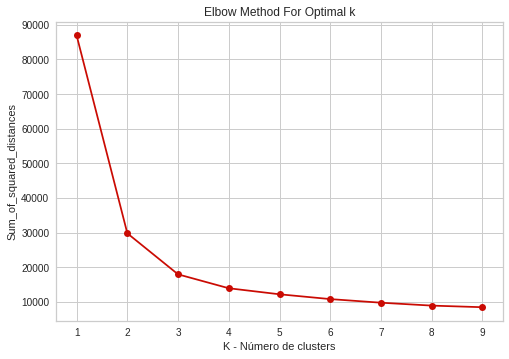

In [82]:
#### EDUARDO - METODO ELBOW PARA ACHAR A QUANTIDADE DE CLUSTER IDEAL - VEJA QUE PELO GRAFICO É 3, A PONTA DO COTOVELO

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_data)
    Sum_of_squared_distances.append(km.inertia_)
    #print(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'ro-')
plt.xlabel('K - Número de clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [83]:
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions1_labels = clustering.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,2,1
1,0,0
2,1,1
3,0,0
4,0,1
5,1,1
6,1,1
7,0,1
8,0,0
9,0,1


Agora que criamos o modelo do kmeans e aplicamos o modelo criado ao conjunto de teste, podemos então avaliar o modelo gerado. 

In [85]:
#avaliando o modelo

print('Coeficiente de Silhueta\n', metrics.silhouette_score(test_data, predictions1_labels)) ### NÃO SUPERVISIONADO... test_data
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(test_data, predictions1_labels)) 

print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(test_labels, predictions1_labels)) ### SUPERVISIONADO... test_labels
print('\nMutual information\n', metrics.mutual_info_score(test_labels, predictions1_labels)) 

### o SILHUETA MELHOROU CONSIDERAVELMENTE, O DAVIES DESPENCOU QUE É MUITO BOM
### A MATRIX CONTINUA ESTRANHA, VEJA A ULTIMA LINHA... 9 DE ACERTO APENAS E O MUTUAL MELHOROU MAIS AINDA ESTÁ BEM PEQUENO
### MAS COMPARANDO TUDO COM O BASELINE, MELHOROU MUITO

### LEMBRANDO QUE ISSO TUDO FOI FEITO COM O DF... SEM BINARIZAÇÃO, DUMMIES E ETC... PURINHO, COMO VEIO AO MUNDO

Coeficiente de Silhueta
 0.44398567322815014

Davies-Bouldin Score
 0.7497426781124604

Matriz de Contingência
 [[52 67 40]
 [41 28 18]
 [49 65  9]]

Mutual information
 0.030770654164656755


Vamos agora testar o comportamento do Kmeans com o df1

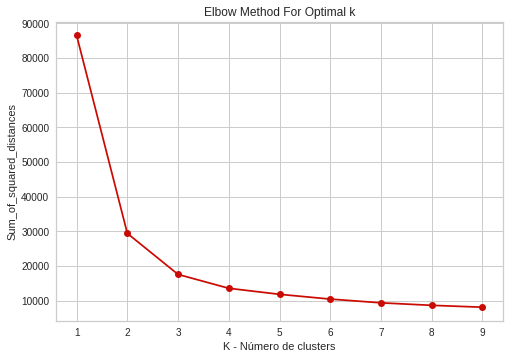

In [86]:
#### EDUARDO - METODO ELBOW PARA ACHAR A QUANTIDADE DE CLUSTER IDEAL - VEJA QUE PELO GRAFICO É 3, A PONTA DO COTOVELO

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_data1)  ###############################  TRAIN_DATA1
    Sum_of_squared_distances.append(km.inertia_)
    #print(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'ro-')
plt.xlabel('K - Número de clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
#definindo hiperparametros
clustering1 = KMeans(n_clusters = 3, random_state = 42)
 
# treinando o modelo no conjunto de dados de treino
clustering1.fit(train_data1);

#clustering1 = KMeans(n_clusters = 3, random_state = 42).fit(train_data1)  ###### ALTERNATIVA... MESMA COISA

# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions11_labels = clustering1.predict(test_data1)


# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels1, 'Previsto': predictions11_labels})  
p.head(10)

,Real,Previsto
0,2,0
1,0,2
2,1,0
3,0,2
4,0,0
5,1,0
6,1,0
7,0,0
8,0,2
9,0,0


In [90]:
# Avaliando o modelo com o df1
print('Coeficiente de Silhueta\n', metrics.silhouette_score(test_data1, predictions11_labels)) 
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(test_data1, predictions11_labels)) 

print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(test_labels1, predictions11_labels)) 
print('\nMutual information\n', metrics.mutual_info_score(test_labels1, predictions11_labels)) 


Coeficiente de Silhueta
 0.4464717655880375

Davies-Bouldin Score
 0.742946874787857

Matriz de Contingência
 [[67 40 52]
 [28 18 41]
 [65  9 49]]

Mutual information
 0.030770654164656755


O resultado do Kmeans qnd comparado ao baseline aprensenta diferenças significativas. 

Vamos dar uma olhada em um outro algoritmo de clusterização!

# Affinity Propagation

Vamos dar uma olhada agora no comportamento do AffinityPropagation

In [98]:
#importar o modelo ###### O AFFINITY OLHA A AFINIDADE.... O KMEANS OLHA A SIMILARIDADE

from sklearn.cluster import AffinityPropagation

#instanciacao 
clustering = AffinityPropagation()

# treinando 
clustering.fit(train_data)


AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [99]:
# aplicando o modelo treinado para a previsão 
predictions2_labels = clustering.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions2_labels})  
p.head(10)

,Real,Previsto
0,2,10
1,0,18
2,1,3
3,0,10
4,0,26
5,1,3
6,1,3
7,0,16
8,0,24
9,0,3


In [93]:
#avaliando o modelo 
print('Coeficiente de Silhueta\n', metrics.silhouette_score(test_data, predictions2_labels)) ### não supervisionado
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(test_data, predictions2_labels)) 

print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(test_labels, predictions2_labels)) ### supervisionado
print('\nMutual informtion\n', metrics.mutual_info_score(test_labels, predictions2_labels)) 


##### MEDIDAS SUPERVISIONADAS NÃO SÃO ADEQUADAS PARA AVALIAR O INFFINITY PROPAGATION POIS A GENTE NÃO CONSEGUE FIXAR O NRO DE CLUSTERS

Coeficiente de Silhueta
 0.12826562350527615

Davies-Bouldin Score
 1.4118372108257398

Matriz de Contingência
 [[ 2  9  2 10  5  5  3  2  3  8  4  7  4 10  5  5 18  1  5  0  2  1 20  5
   6  3  4  6  4]
 [ 2  3  5 10  4  0  1  2  0  5  1  1  0  5  0  6  3  2  3  5  0  6  6  6
   2  1  0  2  6]
 [ 3  1 16 10  2  0  0  0  0 10  9  0  2  2  3  1  7  0  7  6  0  2  4  6
  11  0 10  0 11]]

Mutual informtion
 0.21377471672715767


Vamos agora dar um olhada no comportamento do AffinityPropagation para o df1

In [100]:
# treinando o modelo no conjunto de dados de treino ####### BINARIZADO, DUMMIENIZADO....RSRSR
clustering1 = AffinityPropagation().fit(train_data1)
# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions21_labels = clustering1.predict(test_data1)


# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels1, 'Previsto': predictions21_labels})  
p.head(10)

,Real,Previsto
0,2,28
1,0,22
2,1,25
3,0,2
4,0,21
5,1,7
6,1,25
7,0,6
8,0,11
9,0,7


In [103]:
#avaliando o modelo para o df1
print('Coeficiente de Silhueta\n', metrics.silhouette_score(test_data, predictions21_labels)) ### não supervisionado
print('\nDavies-Bouldin Score\n', metrics.davies_bouldin_score(test_data, predictions21_labels)) 


print('\nMatriz de Contingência\n', metrics.cluster.contingency_matrix(test_labels, predictions21_labels)) ### supervisionado
print('\nMutual informtion\n', metrics.mutual_info_score(test_labels, predictions21_labels)) 


### tivemos uma piora com a BINARIZAÇÃO, DUMMIERIZAÇÃO.....rsrsr

Coeficiente de Silhueta
 0.1052024314178308

Davies-Bouldin Score
 1.6920982902650616

Matriz de Contingência
 [[ 5  3  9  7  5  4  5 10  0 12  1  1  2  7  4  1  3  8  3  2  9 11  4  4
   7 12  4 13  3]
 [ 2  9  3  2  4  4  0  9  2  8  0  2  4  3  0  2  0  3  2  0  5  0  2 11
   0  5  0  5  0]
 [ 2  4 12 13  1  8  3  7  3 10  0  5  6  1  2  0  1  3  1  0  5  9  7  4
   0  7  0  0  9]]

Mutual informtion
 0.1830622794957576


# Na próxima aula vamos começar a falar sobre técnicas de validação de modelos!

#Até lá!